# 라이브러리 호출

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 한글깨짐
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기

In [32]:
# test 데이터를 분석에 활용하는 것은 Data Leakage에 해당하므로 train 데이터만 사용합니다.
train = pd.read_csv('train.csv')
train.head(3)

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0


# 데이터 수, 결측치 확인

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


총 30200 개의 데이터가 존재합니다.  
모든 컬럼이 30200개의 데이터를 가지는 것을 볼 때 결측치가 존재하지 않는 것을 확인할 수 있습니다.  
ID 컬럼을 제외한 모든 컬럼의 데이터타입은 int 혹은 float입니다.  
즉, ID 컬럼 외에 데이터에 문자열이 존재하지 않습니다.

In [34]:
# 데이터의 기술통계량을 확인할 때 describe() 함수를 사용합니다.
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


# 시각화  
### 종속변수 분포 확인
사람들이 전화서비스를 해지(1)하는지 유지(0)하는지 그래프를 그림으로써 비율을 파악할 수 있습니다.

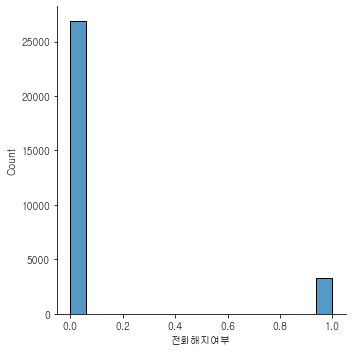

In [35]:
sns.displot(x = train['전화해지여부'])
plt.show()

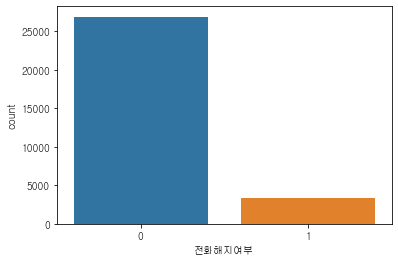

In [40]:
sns.countplot(x=train['전화해지여부'])
plt.show()

### 전체 데이터 분포 확인
양적 변수의 경우 히스토그램을 통해 전체 양상을 파악할 수 있습니다.

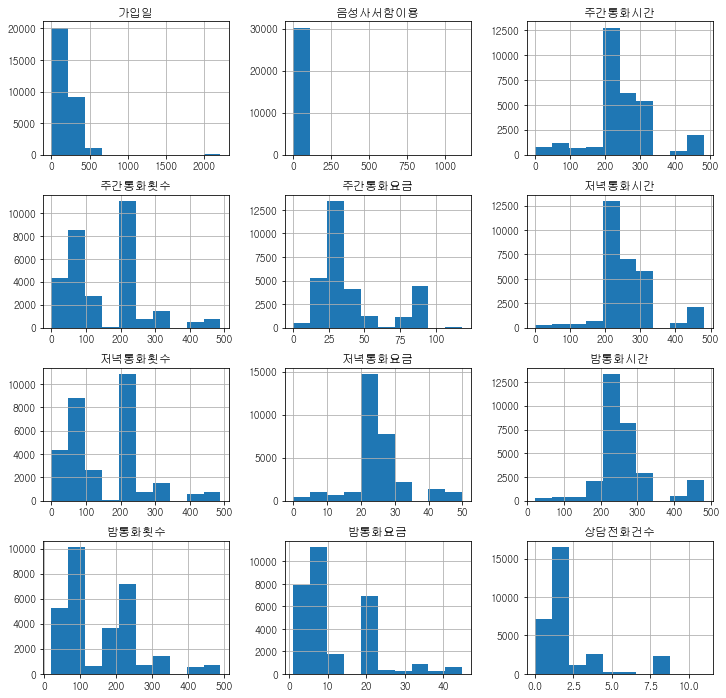

In [36]:
# 위에서 전화해지여부의 분포는 확인하였기에, 확인했던 컬럼은 제외하고 분포를 확인합니다.
except_cancel = train.drop('전화해지여부', axis = 1)
except_cancel.hist(figsize = (12,12))
plt.show()

### 상담전화건수에 따른 전화해지여부  
상담전화횟수를 범주로 하여 서비스 해지 횟수를 그래프로 그릴 수 있습니다.

<AxesSubplot:xlabel='상담전화건수'>

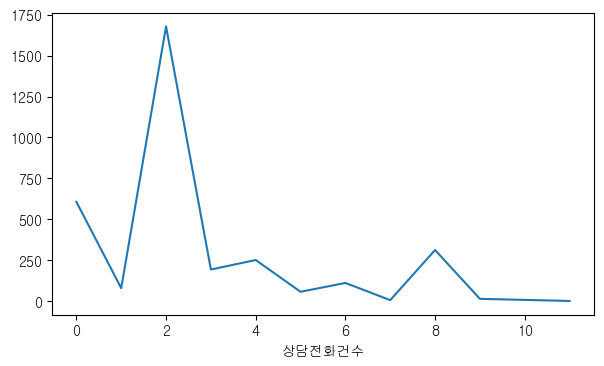

In [37]:
fig, ax = plt.subplots(figsize=(7,4), dpi = 100)

cancel_customcall = train[train['전화해지여부'] == 1].groupby('상담전화건수')['전화해지여부'].count()
cancel_customcall.plot()

### 이상치확인
데이터 내부에는 다른 데이터와 달리 멀리 떨어진 값이 존재합니다.  
이를 이상치라고 하며, 이상치를 탐색하기 위해 주로 boxplot을 사용합니다.

<AxesSubplot:xlabel='전화해지여부', ylabel='음성사서함이용'>

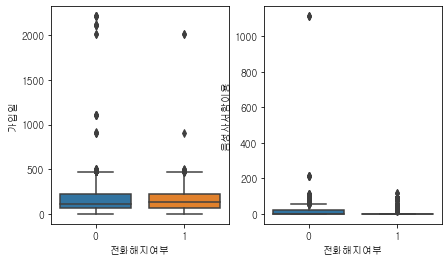

In [38]:
fig,ax = plt.subplots(1,2,figsize=(7,4))

sns.boxplot(x = train['전화해지여부'], y = train['가입일'], ax = ax[0])
sns.boxplot(x = train['전화해지여부'], y = train['음성사서함이용'], ax = ax[1])

### 상관관계 시각화  
feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.  
상관관계 확인을 위해 heatmap을 그려보겠습니다.

<AxesSubplot:>

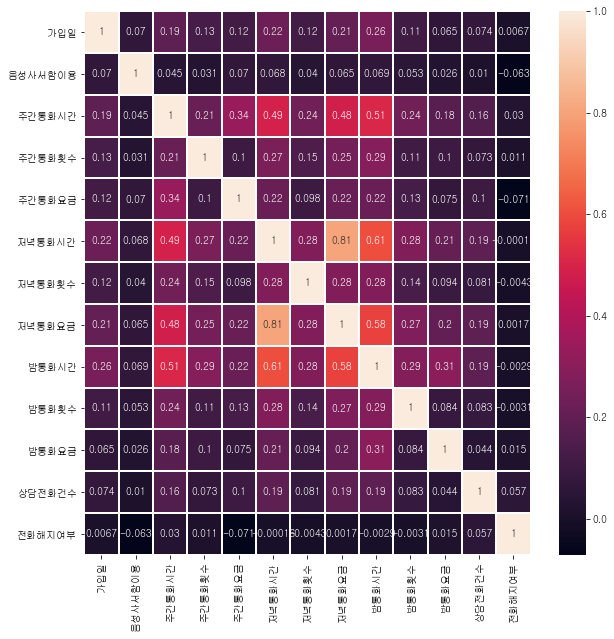

In [39]:
plt.figure(figsize = (10,10))

train_corr = train.corr()
sns.heatmap(train_corr, annot =True, linewidth = 1)

전화해지여부와 가장 높은 상관관계가 있는 건 주간통화시간, 주간통화횟수, 밤통화요금, 상담전화건수